In [ ]:
pip install ITMO_FS

     |████████████████████████████████| 70 kB 3.7 MB/s 
     |████████████████████████████████| 40 kB 5.6 MB/s 
     |████████████████████████████████| 121 kB 11.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for quadprog: filename=quadprog-0.1.11-cp37-cp37m-linux_x86_64.whl size=290748 sha256=9efe23f58dc53824e1bc351b0147dc29e492c42a1921084bb906104af11118c8
  Stored in directory: /root/.cache/pip/wheels/4a/4e/d7/41034ea11aeef1266df3cae546116cb6094e955c41ae3e2589
Successfully built quadprog


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from ITMO_FS.filters.univariate import reliefF_measure

In [ ]:
df = pd.read_csv("data.csv")


In [ ]:
lis = []
for i in range(len(df)) :
  if df['diagnosis'][i] == 'M' :
    lis.append(1)
  else :
    lis.append(0)
Y_ = np.array(lis)

In [ ]:
Y_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
clmns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
def accuracy(m) :
  return (m[0][0]+m[1][1])/(m[0][0]+m[0][1]+m[1][0]+m[1][1])

def sensibility(m) :
  return m[1][1]/(m[1][1]+m[1][0])

def specificity(m) :
  return m[0][0]/(m[0][0]+m[0][1])

def mcc(m) :
  a = m[0][0]*m[1][1] - m[0][1]*m[1][0]
  b = np.sqrt((m[1][1]+m[0][1])*(m[1][1]+m[1][0])*(m[0][0]+m[0][1])*(m[0][0]+m[1][0]))
  return a/b

def auc(model, testX, testY) :
  y_pred_proba = model.predict_proba(testX)[::,1]
  return metrics.roc_auc_score(testY, y_pred_proba)

def most_k_imp(scrs_, k) :
  scrs = scrs_.copy()
  keys = scrs.keys()
  max_scr_key = 0
  for ke in keys :
    max_scr_key = ke
    break
  top_scrs = []
  for i in range(k) :
    for ke in keys:
      if scrs[ke] > scrs[max_scr_key] :
        max_scr_key = ke
    top_scrs.append(max_scr_key)
    scrs[max_scr_key] = 0
  return top_scrs

In [ ]:
def cross_val(X, Y, algorithm, features=-1, cross_validation='cv', k=5, balancing_method='under_sampling') :
  if (features != -1) :
    X_ = pd.DataFrame({feature : df[feature] for feature in features})
    X_ = X_.to_numpy()
    Y_ = df["diagnosis"]
    Y_ = Y_.to_numpy()
  else :
    X_ = X
    Y_ = Y
  if cross_validation == 'cv' :
    splt = KFold(n_splits=k, random_state=1, shuffle=True)
    splits = splt.split(X_)
  elif cross_validation == 'skf' :
    splt = StratifiedKFold(n_splits=k)
    splits = splt.split(X_, Y_)
  model_predictions = []
  actual_labels = []
  scores = []
  if algorithm == 'Gradient_Boosting' :
    model = GradientBoostingClassifier(random_state=42)
  elif algorithm == 'XGradient_Boosting' :
    model = XGBClassifier()
  elif algorithm == 'Logistic_Regression' :
    model = LogisticRegression(random_state=0,  max_iter=100)
  elif algorithm == 'Random_Forest' :
    model = RandomForestClassifier(max_depth=5, random_state=0)
  elif algorithm == 'Gaussian_nb' :
    model = GaussianNB()
  elif algorithm == 'K_Nearest_Neighbors' :
    model = KNeighborsClassifier(n_neighbors=7)
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  fig, ax = plt.subplots()
  n = 0
  for train_index, test_index in splits :
    X_train, Y_train = X_[train_index], Y_[train_index]
    X_test, Y_test = X_[test_index], Y_[test_index]
    if (balancing_method != None and cross_validation == 'cv') :
      if balancing_method == "over_sampling" :
        balancing = RandomOverSampler(random_state=0)
      elif balancing_method == "smote" :
        balancing = SMOTE()
      elif balancing_method == "under_sampling" :
        balancing = RandomUnderSampler(random_state=0)
      X_train, Y_train = balancing.fit_resample(X_train, Y_train)
    model = model.fit(X_train, Y_train)
    #ROC Plot
    viz = RocCurveDisplay.from_estimator(model, X_test, Y_test, name="ROC fold {}".format(n), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    model_predictions.append(model.predict(X_test))
    actual_labels.append(Y_test)
    scores.append(model.score(X_test, Y_test))
    n += 1
  performance_metrics = [{} for i in range(k+1)]
  for i in range(k) :
    performance_metrics[i]['confusion_matrix'] = confusion_matrix(model_predictions[i], actual_labels[i])
    conf_mat = performance_metrics[i]['confusion_matrix']
    performance_metrics[i]['accuracy'] = accuracy(conf_mat)
    performance_metrics[i]['sensibility'] = sensibility(conf_mat)
    performance_metrics[i]['specificity'] = specificity(conf_mat)
    performance_metrics[i]['mcc'] = mcc(conf_mat)
  performance_metrics[k]['accuracy_average'] = np.mean([performance_metrics[i]['accuracy'] for i in range(k)])
  #performance_metrics[k]['accuracy_deviation'] = np.std([performance_metrics[i]['accuracy'] for i in range(k)])
  performance_metrics[k]['sensibility_average'] = np.mean([performance_metrics[i]['sensibility'] for i in range(k)])
  #performance_metrics[k]['sensibility_deviation'] = np.std([performance_metrics[i]['sensibility'] for i in range(k)])
  performance_metrics[k]['specificity_average'] = np.mean([performance_metrics[i]['specificity'] for i in range(k)])
  #performance_metrics[k]['specificity_deviation'] = np.std([performance_metrics[i]['specificity'] for i in range(k)])
  performance_metrics[k]['mcc_average'] = np.mean([performance_metrics[i]['mcc'] for i in range(k)])
  #performance_metrics[k]['mcc_deviation'] = np.std([performance_metrics[i]['mcc'] for i in range(k)])
  return performance_metrics

In [ ]:
def cross_val(X, Y, algorithm, features=-1, cross_validation='cv', k=5, balancing_method='under_sampling') :
  if (features != -1) :
    X_ = pd.DataFrame({feature : df[feature] for feature in features})
    X_ = X_.to_numpy()
    Y_ = df["diagnosis"]
    Y_ = Y_.to_numpy()
  else :
    X_ = X
    Y_ = Y
  if cross_validation == 'cv' :
    splt = KFold(n_splits=k, random_state=1, shuffle=True)
    splits = splt.split(X_)
  elif cross_validation == 'skf' :
    splt = StratifiedKFold(n_splits=k)
    splits = splt.split(X_, Y_)
  model_predictions = []
  actual_labels = []
  scores = []
  if algorithm == 'Gradient_Boosting' :
    model = GradientBoostingClassifier(random_state=42)
  elif algorithm == 'XGradient_Boosting' :
    model = XGBClassifier()
  elif algorithm == 'Logistic_Regression' :
    model = LogisticRegression(random_state=0,  max_iter=100)
  elif algorithm == 'Random_Forest' :
    model = RandomForestClassifier(max_depth=5, random_state=0)
  elif algorithm == 'Gaussian_nb' :
    model = GaussianNB()
  elif algorithm == 'K_Nearest_Neighbors' :
    model = KNeighborsClassifier(n_neighbors=7)
  n = 0
  performance_metrics = [{} for i in range(k+1)]
  for train_index, test_index in splits :
    X_train, Y_train = X_[train_index], Y_[train_index]
    X_test, Y_test = X_[test_index], Y_[test_index]
    if (balancing_method != None and cross_validation == 'cv') :
      if balancing_method == "over_sampling" :
        balancing = RandomOverSampler(random_state=0)
      elif balancing_method == "smote" :
        balancing = SMOTE()
      elif balancing_method == "under_sampling" :
        balancing = RandomUnderSampler(random_state=0)
      X_train, Y_train = balancing.fit_resample(X_train, Y_train)
    model = model.fit(X_train, Y_train)
    model_predictions.append(model.predict(X_test))
    actual_labels.append(Y_test)
    scores.append(model.score(X_test, Y_test))
    performance_metrics[n]['auc'] = auc(model, X_test, Y_test)
    n += 1
  for i in range(k) :
    performance_metrics[i]['confusion_matrix'] = confusion_matrix(model_predictions[i], actual_labels[i])
    conf_mat = performance_metrics[i]['confusion_matrix']
    performance_metrics[i]['accuracy'] = accuracy(conf_mat)
    performance_metrics[i]['sensibility'] = sensibility(conf_mat)
    performance_metrics[i]['specificity'] = specificity(conf_mat)
    performance_metrics[i]['mcc'] = mcc(conf_mat)
  performance_metrics[k]['accuracy_average'] = np.mean([performance_metrics[i]['accuracy'] for i in range(k)])
  performance_metrics[k]['sensibility_average'] = np.mean([performance_metrics[i]['sensibility'] for i in range(k)])
  performance_metrics[k]['specificity_average'] = np.mean([performance_metrics[i]['specificity'] for i in range(k)])
  performance_metrics[k]['mcc_average'] = np.mean([performance_metrics[i]['mcc'] for i in range(k)])
  performance_metrics[k]['auc_average'] = np.mean([performance_metrics[i]['auc'] for i in range(k)])
  return performance_metrics

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
def plt_conf_mat(mat) :
  fig, ax = plot_confusion_matrix(conf_mat=mat)
  plt.show()

In [ ]:
X = df.copy()
X.drop(['id','diagnosis', 'Unnamed: 32'],axis=1,inplace=True)
X = X.to_numpy()
Y = df["diagnosis"]
Y = Y.to_numpy()

In [ ]:
def top_k(scrs_, k) :
  fs = [False for i in range(30)]
  n = len(scrs_)
  scrs = scrs_.copy()
  for i in range(0, k) :
    max_index = 0
    for j in range(n) :
      if scrs[j] > scrs[max_index] :
        max_index = j
    fs[max_index] = True
    scrs[max_index] = -2
  return fs

In [ ]:
def transform(X, fs) :
  X_ = df.copy()
  X_.drop(['id','diagnosis', 'Unnamed: 32'], axis=1, inplace=True)
  for i in range(len(fs)) :
    if fs[i] == False :
      X_.drop([clmns[i]], axis=1, inplace=True)
  X_ = X_.to_numpy()
  return X_



In [ ]:
def prod(x) :
  p = 1
  for i in x:
    p = p*i
  return p
def signa(x, n) :
  a, b, c = sum(x[:n]), prod(x[:n]), sum([x[i]*x[i] for i in range(n)])
  return (a*b*c-(a+b+c))/(a*b+a*c+b*c)
def vars(bo) :
  r = []
  for i in range(30) :
    if bo[i] == True :
      r.append(i)
  return r

In [ ]:
algo = 'XGradient_Boosting'

In [ ]:
scores_lists = []
for n in range(1, len(df)-1) :
  a = reliefF_measure(X, Y_, k_neighbors=n)
  print(n, ' done')
  scores_lists.append(a)

1  done
2  done
3  done


KeyboardInterrupt: ignored

In [ ]:
scores_df = pd.DataFrame()
for k in range(1, len(df)-1) :
  scores_df['neighbors_' + str(k)] = scores_lists[k - 1] 

In [ ]:
scores_list = pd.read_csv('scores')

In [ ]:
scores_list = scores_list.transpose()

In [ ]:
scores_list.columns

RangeIndex(start=0, stop=30, step=1)

In [ ]:
scores_list = scores_list.to_numpy()

In [ ]:
scores_list = [scores_list[i] for i in range(1, len(scores_list))]

In [ ]:
scores_list[len(scores_list)-1]

array([ 0.03566496, -0.00918876,  0.03874905,  0.03502235, -0.0136165 ,
        0.01506641,  0.04249711,  0.05734537, -0.01428939, -0.02160777,
        0.01361124, -0.02274733,  0.01242359,  0.01632284, -0.01795566,
       -0.01040459, -0.00507149, -0.00585945, -0.0149966 , -0.01273578,
        0.04892028, -0.00786818,  0.04921943,  0.04026428, -0.01033924,
        0.01505931,  0.02664337,  0.06111994, -0.00272811, -0.00670007])

In [ ]:
len(scores_list)

567

In [ ]:
signs = []
min_acc = 0.97
max_acc = 0
models = []
best_model = {'algo' : algo, 'k_vars' : 0, 'k_neighbors' : 0, 'acc' : 0, 'sen' : 0, 'spe' : 0, 'mcc' : 0, 'auc' : 0}
k_neighbors = 1
vars_ = []
for scores in scores_list :
  for k in range(1, 30) :
    fs = top_k(scores, k)
    sign = signa(vars(fs), k)
    if sign in signs :
      continue
    signs.append(sign)
    X_ = transform(X, fs)
    perf = cross_val(X_, Y, algo, cross_validation='skf')
    if perf[5]['accuracy_average'] >= min_acc :
      mod = {'algo' : algo,
             'k_vars' : k,
             'k_neighbors' : k_neighbors,
             'acc' : perf[5]['accuracy_average'],
             'sen' : perf[5]['sensibility_average'],
             'spe' : perf[5]['specificity_average'],
             'auc' : perf[5]['auc_average'],
             'mcc' : perf[5]['mcc_average']}
      models.append(mod)
      vars_.append(fs)
      print(mod)
    print(k_neighbors, k)
  k_neighbors += 1

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
2 2
2 5
2 6
2 7
2 11
2 12
2 13
2 14
2 15
2 17
2 18
2 19
2 20
2 21
2 22
2 24
2 26
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 24
3 25
{'algo': 'XGradient_Boosting', 'k_vars': 26, 'k_neighbors': 3, 'acc': 0.9701288619779536, 'sen': 0.9710514669675192, 'spe': 0.9700728419221569, 'auc': 0.9924962132831443, 'mcc': 0.936387325405404}
3 26
3 27
3 28
4 11
4 14
4 15
4 19
{'algo': 'XGradient_Boosting', 'k_vars': 23, 'k_neighbors': 4, 'acc': 0.971883247942866, 'sen': 0.9758075645284947, 'spe': 0.9702209352209351, 'auc': 0.9906559728742828, 'mcc': 0.9402349174496205}
4 23
{'algo': 'XGradient_Boosting', 'k_vars': 25, 'k_neighbors': 4, 'acc': 0.9701288619779536, 'sen': 0.9710514669675192, 'spe': 0.9700728419221569, 'auc': 0.9924319387470387, 'mcc': 0.936387325405404}
4 25
4 27
4 28
5 3
5 4
5 6
5 11
5 12
5 13
5 14
5 15
5 17
5 28
6 12


In [ ]:
av_acc = np.mean([models[i]['acc'] for i in range(30)])
std_acc = np.std([models[i]['acc'] for i in range(30)])
av_mcc = np.mean([models[i]['mcc'] for i in range(30)])
std_mcc = np.std([models[i]['mcc'] for i in range(30)])
av_auc = np.mean([models[i]['auc'] for i in range(30)])
std_auc = np.std([models[i]['auc'] for i in range(30)])

<BarContainer object of 30 artists>

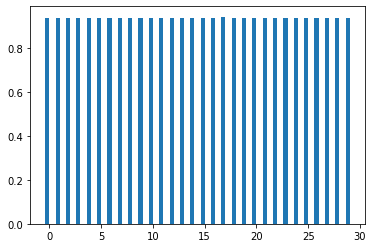

In [ ]:

x = np.arange(30)
width = 0.40
  
# plot data in grouped manner of bar type

plt.bar(x-0.2, [models[i]['mcc']for i in range(30)], width)


In [ ]:
max([models[i]['mcc']for i in range(30)])

0.9442183205797747

In [ ]:
best_models = []
max_acc = 0
index = 0
i = 0
for mdl in models :
  if mdl['acc'] > max_acc :
    max_acc = mdl['acc']
    index = i
  i += 1


In [ ]:
vars_occ = [sum([x[i] for x in vars_]) for i in range(30)]
print(vars_occ)


[29, 19, 30, 29, 20, 30, 30, 30, 13, 15, 25, 0, 19, 21, 2, 14, 6, 12, 6, 9, 30, 30, 30, 30, 26, 30, 30, 30, 28, 26]


In [ ]:
print([vars_[index][i]*vars_occ[i] for i in range(30)])

[29, 0, 30, 29, 20, 30, 30, 30, 0, 0, 25, 0, 0, 21, 0, 0, 0, 0, 0, 0, 30, 30, 30, 30, 26, 30, 30, 30, 28, 26]


In [ ]:
print(vars_[index])

[True, False, True, True, True, True, True, True, False, False, True, False, False, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True]


In [ ]:
perfs = []
for i in range(30) :
  new_fs = vars_[index].copy()
  if new_fs[i] == True :
    new_fs[i] = False
  else :
    new_fs[i] = True
  perf = cross_val(transform(X, new_fs), Y, algo, cross_validation='skf')
  if perf[5]['accuracy_average'] >= models[index]['acc'] :
    perfs.append({'feature' : i, 'state' : vars_[index][i], 'acc' : perf[5]['accuracy_average']})

In [ ]:
perfs

In [ ]:
new_fs = vars_[index].copy()
new_fs[22] = False
perf = cross_val(transform(X, new_fs), Y, algo, cross_validation='skf')
perf[5]


In [ ]:
best_so_far = new_fs.copy()
best_model = cross_val(transform(X, best_so_far), Y, algo, cross_validation='skf')
best_model[5]['accuracy_average']

In [ ]:
perfs = []
for i in range(30) :
  new_fs = best_so_far.copy()
  if new_fs[i] == True :
    new_fs[i] = False
  else :
    new_fs[i] = True
  perf = cross_val(transform(X, new_fs), Y, algo, cross_validation='skf')
  if perf[5]['accuracy_average'] >= best_model[5]['accuracy_average'] :
    perfs.append({'feature' : i, 'state' : best_so_far[i], 'acc' : perf[5]['accuracy_average']})


In [ ]:
perfs

In [ ]:
new_fs = best_so_far.copy()
new_fs[0] = True
perf = cross_val(transform(X, new_fs), Y, algo, cross_validation='skf')
perf[5]

In [ ]:
explored_models = []
accs = []
def explor(fs, acc) :
  if (sum(fs) < 10 or sum(fs) > 28) :
    return
  explored_models.append(fs)
  perfs = []
  for i in range(30) :
    neighbor = fs.copy()
    neighbor[i] = not fs[i]
    if (neighbor not in explored_models) :
      perf = cross_val(transform(X, neighbor), Y, algo, cross_validation='skf')
      if perf[5]['accuracy_average'] >= acc :
        accs.append(perf[5]['accuracy_average'])
        explor(neighbor, perf[5]['accuracy_average'])
        print(perf[5]['accuracy_average'])
      

In [ ]:
import random
fss = [random.randint(0, 1) == 0 for i in range(30)]
fss

[False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True]

In [ ]:
explor(fss, 0)

0.9806707033069397
0.9806707033069397
0.9806707033069397
0.9806707033069397
0.9806862288464524
0.9824406148113647


KeyboardInterrupt: ignored

In [ ]:
max_acc = 0
pos = 0
for i in range(len(accs)) :
  if accs[i] > max_acc :
    max_acc = accs[i]
    pos = i
print(max_acc, pos)

0.9859493867411893 109


In [ ]:
print(len(explored_models), len(accs))

395 394


In [ ]:
models_ = explored_models.copy()

In [ ]:
best_so_far = explored_models[327]
perf_max = cross_val(transform(X, best_so_far), Y, algo, cross_validation='skf')
print(best_so_far)
perf_max[5]

[True, True, True, True, True, False, False, True, True, False, False, False, True, True, False, False, False, False, False, True, False, True, False, True, False, True, True, False, False, True]


{'accuracy_average': 0.987719298245614,
 'auc_average': 0.9948676555456771,
 'mcc_average': 0.9739726853024475,
 'sensibility_average': 0.9952380952380953,
 'specificity_average': 0.9835966103089391}

In [ ]:
print([int(vars_[index][i]) for i in range(30)])
print([int(best_so_far[i]) for i in range(30)])

[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1]


[29, 19, 30, 29, 20, 0, 0, 30, 13, 0, 0, 0, 19, 21, 0, 0, 0, 0, 0, 9, 0, 30, 0, 30, 0, 30, 30, 0, 0, 26]


In [ ]:
best_so_far

In [ ]:
bfs(best_so_far, perf_max[5]['accuracy_average'])

In [ ]:
best_so_far = explored_models[256].copy()

In [ ]:
bfs(best_so_far, perf_max[5]['accuracy_average'])

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([i for i in range(30)], vars_occ, width=0.4)
plt.show()

In [ ]:
_X = df.copy()
_X.drop(['id','diagnosis', 'Unnamed: 32'],axis=1,inplace=True)
corr = _X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
_X

In [ ]:
_vars = [False for i in range(30)]
for i in range(30) :
  if vars_occ[i] > 25 :
    _vars[i] = True

In [ ]:
sum(_vars)

In [ ]:
X_ = transform(X, _vars)
perf = cross_val(X_, Y, algo, cross_validation='skf')

In [ ]:
perf[5]